In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('insurance.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
# change variables from object to categorical 
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 66.8 KB


EXPLORATORY DATA ANALYSIS 

Mean age: 39.20702541106129, Max age: 64, Min age: 18


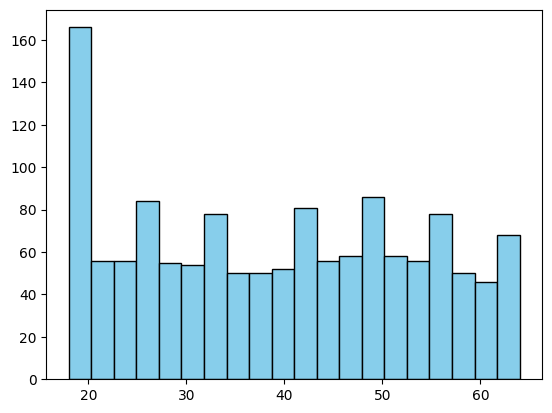

In [7]:
# distribution of age 
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
print(f"Mean age: {df['age'].mean()}, Max age: {df['age'].max()}, Min age: {df['age'].min()}")

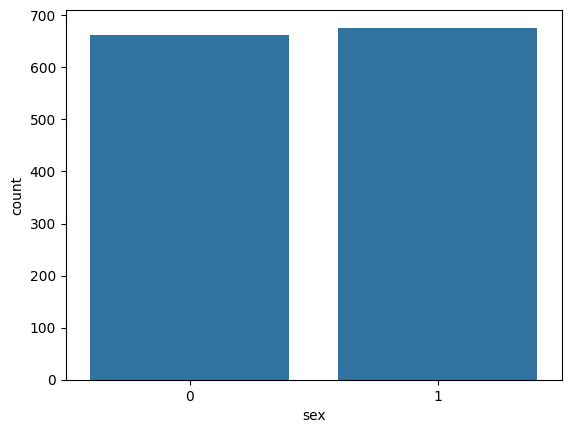

sex
1    676
0    662
Name: count, dtype: int64


In [8]:
# distribution of sex 
sns.countplot(x='sex', data=df)
plt.show()
print(df['sex'].value_counts())

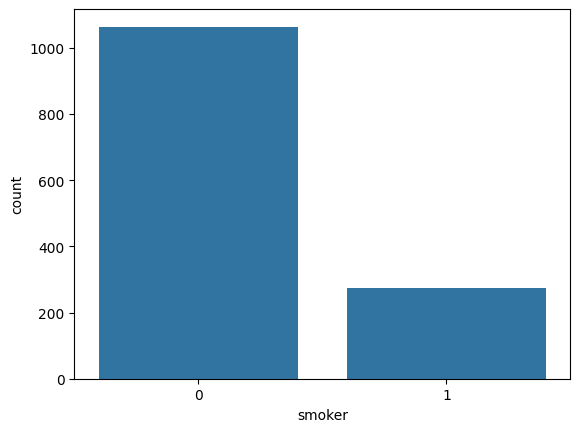

smoker
0    1064
1     274
Name: count, dtype: int64


In [9]:
#distribution of smoker 
sns.countplot(x='smoker', data=df)
plt.show()
print(df['smoker'].value_counts())

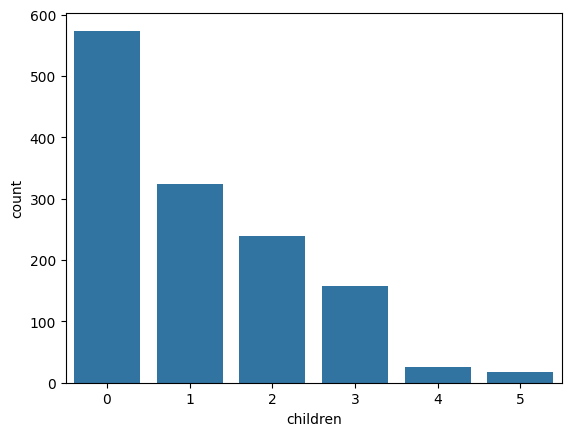

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [10]:
# distribution of children 
sns.countplot(x='children', data=df)
plt.show()
print(df['children'].value_counts())

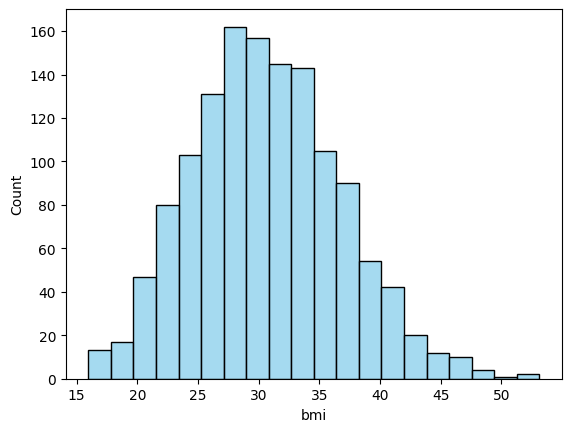

Mean bmi: 30.66339686098655, Max bmi: 53.13, Min bmi: 15.96


In [11]:
# distribution of bmi 
sns.histplot(df['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.show()
print(f"Mean bmi: {df['bmi'].mean()}, Max bmi: {df['bmi'].max()}, Min bmi: {df['bmi'].min()}")

can see bmi as following a normal distribution maybe ???? if that's the case we can use this fact to make future predictions

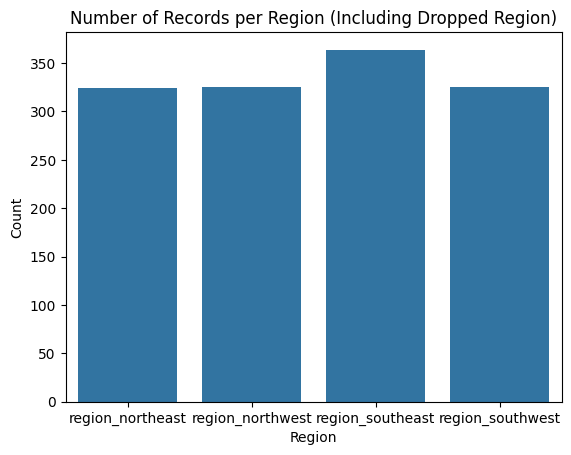

In [12]:
# plot distribution of regions 
# Identify one-hot encoded region columns
region_cols = [col for col in df.columns if col.startswith('region_')]

# Get counts for the encoded regions
region_counts = df[region_cols].sum()

# Compute count for the dropped region
base_region = 'region_northeast'  # <- replace with whichever region was dropped
base_region_count = len(df) - region_counts.sum()

# Add the dropped region to the count series
region_counts[base_region] = base_region_count

# Sort by region name (optional)
region_counts = region_counts.sort_index()

# Plot
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Records per Region (Including Dropped Region)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

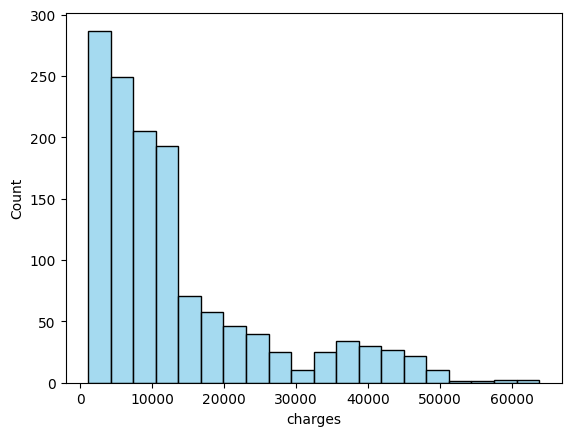

Mean charges: 13270.422265141257, Max charges: 63770.42801, Min charges: 1121.8739


In [13]:
#plot distribution of charges 
sns.histplot(df['charges'], bins=20, color='skyblue', edgecolor='black')
plt.show()
print(f"Mean charges: {df['charges'].mean()}, Max charges: {df['charges'].max()}, Min charges: {df['charges'].min()}")

<Axes: >

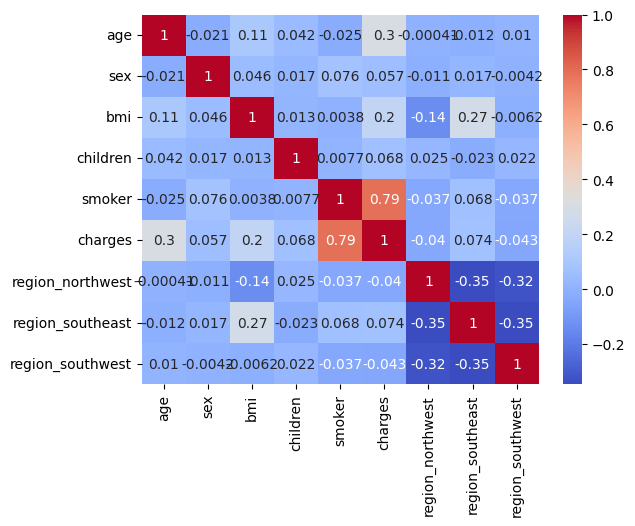

In [14]:
# correlation matrix 
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')